Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* I'm glad to say that you executed your project really well.
* Thank you for structuring the project. It's a pleasure to check such notebooks.
* There are a couple of things that need to be done before your project is complete, but they're pretty straightforward.
* I've left some comments which could help you to improve your project and further develop your skills.
* I believe you can easily fix it! Good luck!

### <font color='orange'>General feedback (review 2)</font>
* Thanks for sending in your project with corrections. It's clear you've put a lot of effort into it.
* You're checking image size after resacling. Before it not all of them have equal size.
* Your project has passed code review. Congratulations!
* You've mastered your first project in CV! Keep up the good work.

# 1. Exploratory data analysis

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


No missing values found!

<div class="alert alert-block alert-info">
<b>Improve: </b> Don't forget about default methods that help to get general information of imported file (head, info). May be there are some missing values.
</div>

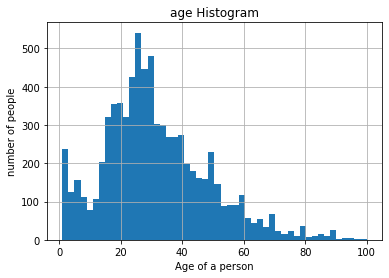

In [10]:
df['real_age'].hist(bins=50)
plt.title('age Histogram');
plt.xlabel('Age of a person');
plt.ylabel('number of people');

<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if axes were named and title was created.
</div>

In [11]:
df['real_age'].mean()

31.20115926755368

In [12]:
df['real_age'].median()

29.0

Histogram is skewed to the left with a mean of around 31 years.

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> What about some analysis of histogram? Add some comments.
</div>

In [13]:
datagen = ImageDataGenerator()

In [14]:
train_datagen_flow = datagen.flow_from_dataframe(dataframe=df,directory='/datasets/faces/final_files/' ,
        x_col='file_name',y_col='real_age',
        target_size=(224,224),
        batch_size=10,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


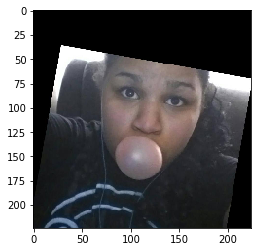

In [16]:
features, target = next(train_datagen_flow)
image_array = np.array(features[0])
plt.imshow(image_array.astype('uint8'))

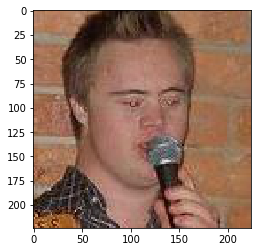

In [17]:
features, target = next(train_datagen_flow)
image_array = np.array(features[0])
plt.imshow(image_array.astype('uint8'))

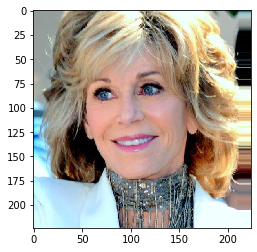

In [18]:
features, target = next(train_datagen_flow)
image_array = np.array(features[0])
plt.imshow(image_array.astype('uint8'))

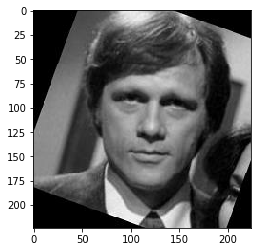

In [19]:
features, target = next(train_datagen_flow)
image_array = np.array(features[0])
plt.imshow(image_array.astype('uint8'))

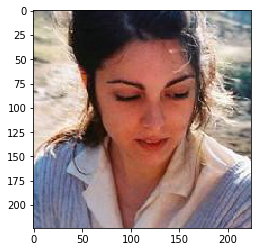

In [21]:
features, target = next(train_datagen_flow)
image_array = np.array(features[0])
plt.imshow(image_array.astype('uint8'))

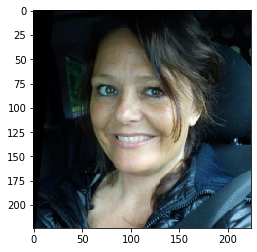

In [22]:
features, target = next(train_datagen_flow)
image_array = np.array(features[0])
plt.imshow(image_array.astype('uint8'))

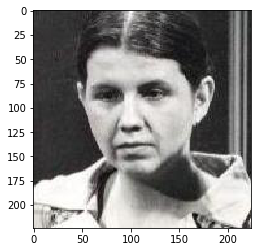

In [23]:
features, target = next(train_datagen_flow)
image_array = np.array(features[0])
plt.imshow(image_array.astype('uint8'))

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Please print some more images. Don't forget to say some words about photos: rotation, size, color, etc.
</div>

Image size is 224 by 224, They use RGB colloring, some of them are black and white

<div class="alert alert-block alert-info">
<b>Improve: </b> It is a good idea to write person's age in title.
</div>

# 2. Model training

Transfer the model training code and the result of printing on the screen here.


(The code in this section is run on a separate GPU platform, so it is not designed as a cell with a code, but as a code in a text cell)

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd

df =pd.read_csv('/datasets/faces/labels.csv')
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,validation_split=0.25,
        rescale=1/255.)
    train_datagen_flow = datagen.flow_from_dataframe(dataframe=labels,directory=path + 'final_files/' ,
        x_col='file_name',y_col='real_age',
        target_size=(224,224),
        batch_size=16,
        class_mode='raw',subset='training',
        seed=12345)
    return train_datagen_flow
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    datagen = ImageDataGenerator(validation_split=0.25,rescale=1./255)
    val_datagen_flow = datagen.flow_from_dataframe(dataframe=labels,directory=path + 'final_files/' ,
    x_col='file_name',y_col='real_age',
    target_size=(224,224),
    batch_size=16,
    class_mode='raw',subset='validation',
    seed=12345)
    return val_datagen_flow
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,weights='imagenet',include_top=False)
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1))
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer,loss='mse',metrics=['mae'])
    return model
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model

```

<div class="alert alert-block alert-success">
<b>Success:</b> Great that augmentation was done only on train part.
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> Vertical flip creates images that are not similar to test data. So it's not a good idea to apply it to photos.
</div>

```
356/356 - 109s - loss: 229.3686 - mae: 11.2128 - val_loss: 646.7976 - val_mae: 20.4494
Epoch 2/20
356/356 - 39s - loss: 112.0302 - mae: 8.0305 - val_loss: 162.7853 - val_mae: 9.4858
Epoch 3/20
356/356 - 39s - loss: 88.8568 - mae: 7.1547 - val_loss: 82.7700 - val_mae: 6.9253
Epoch 4/20
356/356 - 39s - loss: 73.2441 - mae: 6.5004 - val_loss: 95.3725 - val_mae: 7.3646
Epoch 5/20
356/356 - 38s - loss: 64.1012 - mae: 6.1168 - val_loss: 86.2041 - val_mae: 6.7967
Epoch 6/20
356/356 - 39s - loss: 52.0793 - mae: 5.5211 - val_loss: 95.1037 - val_mae: 7.2866
Epoch 7/20
356/356 - 39s - loss: 44.1554 - mae: 5.0928 - val_loss: 72.9832 - val_mae: 6.5103
Epoch 8/20
356/356 - 38s - loss: 38.4098 - mae: 4.7149 - val_loss: 84.8873 - val_mae: 6.9309
Epoch 9/20
356/356 - 39s - loss: 35.5014 - mae: 4.5547 - val_loss: 106.3844 - val_mae: 7.8563
Epoch 10/20
356/356 - 39s - loss: 33.2866 - mae: 4.4041 - val_loss: 106.1374 - val_mae: 7.9907
Epoch 11/20
356/356 - 38s - loss: 27.1707 - mae: 4.0073 - val_loss: 73.8072 - val_mae: 6.3960
Epoch 12/20
356/356 - 39s - loss: 25.2299 - mae: 3.8305 - val_loss: 83.1804 - val_mae: 6.9796
Epoch 13/20
356/356 - 39s - loss: 24.4392 - mae: 3.7499 - val_loss: 77.5945 - val_mae: 6.5248
Epoch 14/20
356/356 - 39s - loss: 24.1812 - mae: 3.7264 - val_loss: 75.0279 - val_mae: 6.6015
Epoch 15/20
356/356 - 39s - loss: 22.1519 - mae: 3.6128 - val_loss: 83.8903 - val_mae: 7.0077
Epoch 16/20
356/356 - 38s - loss: 19.4098 - mae: 3.3677 - val_loss: 77.0927 - val_mae: 6.4553
Epoch 17/20
356/356 - 39s - loss: 18.2775 - mae: 3.2677 - val_loss: 84.1362 - val_mae: 6.9371
Epoch 18/20
356/356 - 39s - loss: 16.7914 - mae: 3.1226 - val_loss: 67.2642 - val_mae: 6.0977
Epoch 19/20
356/356 - 38s - loss: 15.9266 - mae: 3.0445 - val_loss: 67.2971 - val_mae: 6.0971
Epoch 20/20
356/356 - 39s - loss: 15.3465 - mae: 2.9630 - val_loss: 97.6622 - val_mae: 7.7848
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 97.6622 - mae: 7.7848
Test MAE: 7.7848

```

<div class="alert alert-block alert-info">
<b>Improve: </b> Wow... we can see a huge overfitiing at the last epoch.
</div>

# 3. Trained model analysis

I used the ResNet50 model with one neuron on the last layer withput an activation function. After training the model I achieved MAE score of 7.78. For the model I also used horizontal and vertical flips.

<div class="alert alert-block alert-success">
<b>Success:</b> Great that result MAE was pointed out in the conclusion.
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> You could aslo say some words about parameters and augmentations that were used.
</div>

# Checklist

- [x]  Notebook was opened
- [x]  The code is error free
- [x]  The cells with code have been arranged by order of execution
- [x]  The exploratory data analysis has been performed
- [x]  The results of the exploratory data analysis have been transferred to the final notebook
- [x]  The model's MAE score is not higher than 8
- [x]  The model training code has been copied to the final notebook
- [x]  The model's printing on the screen result has been transferred to the final notebook
- [x]  The findings have been provided based on the results of the model training